## 特征选择

**实验任务：**选择泰坦尼克号乘客数据集中有预测能力的变量

**实验课时：**1课时

**实验目的：**

* 了解特征选择在机器学习中的作用；
* 理解统计方法和机器学习方法做特征选择的计算方法；
* 掌握特征选择的实现方法。

特征选择是指在数据集中选取若干代表性强或预测能力强的变量子集，使得机器学习模型训练更高效且性能不下降。

载入需要用到的程序包。

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFromModel, chi2, f_classif
pd.set_option('mode.chained_assignment',None)

In [22]:
titanic3_file_path="./titanic3.xls"
titanic3 = pd.read_excel(titanic3_file_path)
titanic3.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [23]:
X = titanic3[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
y = titanic3['survived']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 123)

填充训练集和测试集的缺失值。

In [24]:
imp = SimpleImputer(strategy='median')
train_X[['age','fare']] = imp.fit_transform(train_X[['age','fare']])
test_X[['age','fare']] = imp.transform(test_X[['age','fare']])

In [ ]:
做训练集和测试集的独热编码。

In [25]:
categorical_cols = ['pclass','sex','embarked']
numeric_cols = list(set(X.columns) - set(categorical_cols))
ohe = OneHotEncoder(drop = 'first', sparse = False)
train_X = np.hstack((ohe.fit_transform(train_X[categorical_cols]), train_X[numeric_cols]))
cols = ["pclass_2nd","pclass_3rd","sex_male","embarked_Queenstown","embarked_Southampton","embarked_Unknown","sibsp","fare","age","parch"]
train_X = pd.DataFrame(train_X, columns = cols)
test_X = np.hstack((ohe.transform(test_X[categorical_cols]), test_X[numeric_cols]))
test_X = pd.DataFrame(test_X, columns = cols)
train_X.head(10)

,pclass_2nd,pclass_3rd,sex_male,embarked_Queenstown,embarked_Southampton,embarked_Unknown,sibsp,fare,age,parch
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,26.5500,35.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,16.1000,30.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,17.4000,36.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,18.7875,26.0,0.0
4,0.0,1.0,1.0,0.0,1.0,0.0,2.0,14.1083,41.0,0.0
5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,39.6000,27.0,0.0
6,0.0,0.0,1.0,0.0,1.0,0.0,0.0,26.5500,60.0,0.0
7,0.0,1.0,0.0,0.0,1.0,0.0,2.0,34.3750,9.0,2.0
8,0.0,1.0,1.0,0.0,1.0,0.0,0.0,7.5500,27.0,0.0
9,1.0,0.0,1.0,0.0,0.0,0.0,0.0,13.8625,27.0,0.0


### 1.  统计方法

#### 1.1. 按数量选择

调用程序包`sklearn.feature_selection`的构造函数`SelectKBest()`创建特征选择器，用于选择一定**数量**的重要性最高的特征，其中

* 第1个参数`score_func`表示计算统计量的函数，`f_classif`为ANOVA方差分析得到的F值，`chi2`为卡方值；
* 第2个参数`k`表示选择重要性最高的特征变量数。

调用特征选择器的函数`fit()`做训练。

In [27]:
skb = SelectKBest(chi2, k = 6)
skb.fit(train_X, train_y)

SelectKBest(k=6, score_func=<function chi2 at 0x00000200DE1DEA60>)

查看特征选择器的属性scores_得到每个变量对应的重要性分数。

In [28]:
skb.scores_
cols = train_X.columns
scores = pd.DataFrame({'feature': cols, 'score': skb.scores_})
scores.sort_values("score", ascending = False, inplace=True)
scores

,feature,score
7,fare,3173.662369
2,sex_male,84.220715
8,age,38.354588
1,pclass_3rd,28.318745
9,parch,11.332436
4,embarked_Southampton,8.469616
0,pclass_2nd,3.825527
5,embarked_Unknown,3.219373
6,sibsp,2.978252
3,embarked_Queenstown,0.201028


可以看出，变量fare、sex、pclass和age的重要性较高。

绘制特征重要性的柱状图，纵坐标为对数比例。

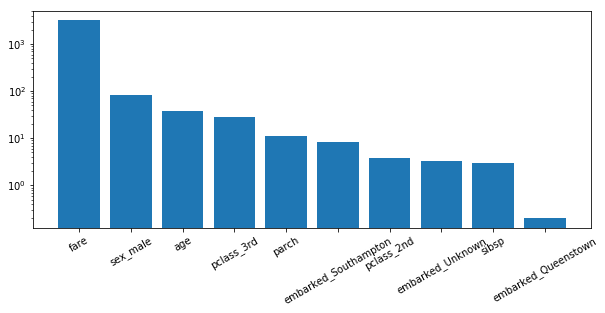

In [31]:
plt.figure(figsize = (10,4))
plt.bar(np.arange(10), scores['score'], log = True)
plt.xticks(np.arange(10), scores['feature'], rotation = 30)
plt.show()

调用特征选择器的函数transform()仅保留训练集中选出的特征变量，返回仅包含选出变量的Numpy数组。

In [32]:
train_X_6 = skb.transform(train_X)
train_X_6 = pd.DataFrame(train_X_6, columns = cols[scores[:6].index.sort_values()])
train_X_6.head()

,pclass_3rd,sex_male,embarked_Southampton,fare,age,parch
0,0.0,1.0,0.0,26.5500,35.0,0.0
1,1.0,1.0,1.0,16.1000,30.0,0.0
2,1.0,0.0,1.0,17.4000,36.0,0.0
3,1.0,1.0,0.0,18.7875,26.0,0.0
4,1.0,1.0,1.0,14.1083,41.0,0.0


可以看出，输出结果仅保留了6个变量。

#### 1.2. 按比例选择

调用程序包`sklearn.feature_selection`中的构造函数`SelectPercentile()`创建特征选择器，用于选择一定**比例**的重要性最高的特征，其中

* 第1个参数`score_func`表示计算统计量的函数，`f_classif`为ANOVA方差分析得到的F值，`chi2`为卡方值；
* 第2个参数`percentile`表示选择重要性最高的特征百分比。

调用特征选择器的函数`fit()`做训练。

调用特征选择器的函数`transform()`仅保留训练集中选出的特征变量，返回仅包含选出变量的Numpy数组。

In [33]:
sp = SelectPercentile(chi2, percentile = 60)
sp.fit(train_X, train_y)
train_X_p60 = sp.transform(train_X)
train_X_p60[:5]

array([[ 0.    ,  1.    ,  0.    , 26.55  , 35.    ,  0.    ],
       [ 1.    ,  1.    ,  1.    , 16.1   , 30.    ,  0.    ],
       [ 1.    ,  0.    ,  1.    , 17.4   , 36.    ,  0.    ],
       [ 1.    ,  1.    ,  0.    , 18.7875, 26.    ,  0.    ],
       [ 1.    ,  1.    ,  1.    , 14.1083, 41.    ,  0.    ]])

可以看出，输出结果仅保留了60\%的变量即6个变量。

### 2. 机器学习方法

调用程序包`sklearn.feature_selection`的构造函数`SelectFromModel()`创建特征选择器，用于选择机器学习模型变量重要性大于一定阈值的特征，其中

* 第1个参数`estimator`表示机器学习模型，必须有属性`coef_`或`feature_importances_`，这里指定随机森林模型，具体会在之后章节介绍；
* 第2个参数`threshold`表示选择重要性的阈值。

调用特征选择器的函数`fit()`做训练，输入参数为训练集的自变量和因变量Numpy数组。

调用特征选择器的函数`transform()`仅保留训练集中选出的特征变量，返回仅包含选出变量的Numpy数组。

In [34]:
clf = RandomForestClassifier()
sfm = SelectFromModel(clf, threshold = 0.02)
sfm.fit(train_X, train_y)
train_X_clf = sfm.transform(train_X)
train_X_clf[:5]

array([[ 0.    ,  1.    ,  0.    ,  0.    , 26.55  , 35.    ,  0.    ],
       [ 1.    ,  1.    ,  1.    ,  1.    , 16.1   , 30.    ,  0.    ],
       [ 1.    ,  0.    ,  1.    ,  1.    , 17.4   , 36.    ,  0.    ],
       [ 1.    ,  1.    ,  0.    ,  0.    , 18.7875, 26.    ,  0.    ],
       [ 1.    ,  1.    ,  1.    ,  2.    , 14.1083, 41.    ,  0.    ]])

可以看出，输出结果仅保留了重要性大于0.02的7个变量。

使用特征选择器的属性estimator_得到使用的机器学习模型，进而使用其属性feature_importances_得到特征的重要性，排序并查看每个特征的重要性。

In [35]:
scores = pd.DataFrame({'feature': cols, 'score': sfm.estimator_.feature_importances_})
scores.sort_values("score", ascending = False, inplace=True)
scores

,feature,score
7,fare,0.284147
8,age,0.274550
2,sex_male,0.245408
1,pclass_3rd,0.053094
6,sibsp,0.047208
9,parch,0.042804
4,embarked_Southampton,0.028904
0,pclass_2nd,0.014952
3,embarked_Queenstown,0.008722
5,embarked_Unknown,0.000211


绘制特征重要性的柱状图。

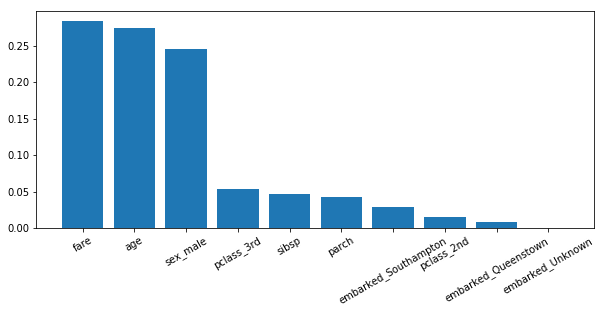

In [36]:
plt.figure(figsize = (10,4))
plt.bar(np.arange(10), scores['score'])
plt.xticks(np.arange(10), scores['feature'], rotation = 30)
plt.show()

可以看出，变量`age`、`fare`和`sex`的重要性较高。